## Lab 4

## Метод опорних векторів

Метод опорних векторів (`Support Vector Machines` or `SVM` for short) - це метод, що визначає певну лінію у простоорі, що поділяє дані на частини.

Цей метод належить до групи ядерних методів (`kernel methods`), та є моделю на основі екземплярів даних (`instance-based model`): тобто модель не вивчає виключно ряд внутрішніх параметрів, а зберігає навчальні дані. При класифікації тестових (невідомих) даних, модель використовує певну функцію схожості (`similarity function`), що називається ядерною функцією або ядром (`kernel`).

![](https://miro.medium.com/max/1200/1*Sg6wjASoZHPphF10tcPZGg.png)

**Увага**. Під лінією не завжди мається на увазі пряма. Розгляньте приклади нижче.

![](https://miro.medium.com/max/1200/1*NN5VCpVg9gPCLYrDl0YFYw.png)

Реальні дані рідко потрапляють під просту функцію. Погляньте нижче.

![](https://miro.medium.com/max/1200/1*fv8DDZLaR0t7SO-W6tdDAg.png)

Ви можете в цьому випадку будувати як просту лінію так і складну. Обидва варіанти нижче є правильними. В першому випадку ви вважаєте, що дві чорні точки є викидами (`outliers`), а в другому ви будуєте чіткий розподіл.

![](https://miro.medium.com/max/1200/1*1dwut8cWQ-39POHV48tv4w.png)
![](https://miro.medium.com/max/1200/1*gt_dkcA5p0ZTHjIpq1qnLQ.png)

В реальних задачає таких точок, що не підпадають під просту лінію може бути дуже багато. І зазвичай вам потрібно щось середнє між двома випадками наведеними нижче: ви маєте частину точок прийняти за викиди, між іншими провести чіткий розподіл.

Крім того, чим більш складну лінію ви будуєте, тим більше часу та обчислювальних ресурсів вам потрібно.

Цей рівень складності лінії в моделі задається окремим параметром регуляризації (`regularization parameter`). Чим вище значення цього параметра, тим більш складну лінію буде побудовано.

Ще одним параметром регуляризації SVM є гамма (`Gamma`). Вона визначає вплив окремих екземплярів на структуру лінії в залежності від їх віддалення від цієї лінії.

Чим більше значення гамма, тим більшим буде вплив точок, що знаходяться близько до лінії. В деяких випадках, велике значення гамма може означати, що віддалені точки взагалі не враховуватимуться.

І ще одним параметром є відступ (`margin`), що визначає відстані між лінією і найближчими екземплярами різних класів.

![](https://miro.medium.com/max/1200/1*Ftns0ebfUHJDdpWt3Wvp-Q.png)
![](https://miro.medium.com/max/1200/1*NbGV1iEtNuklACNUv74w7A.png)

## SVM в Python

Різні варіанти реалізації SVM в Python імплементовані в бібліотеці `Scikit-Learn` (sklearn).

### Завдання 1

Перегляньте [`документацію класу SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Які типи ядер підтримуються бібліотекою? Яке ядро використовується за замовчуванням?

**Відповідь**: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, additional ability of own implementation (callable)

## Забруднюємо руки

Спочатку імпортнемо необхідні бібліотеки та функції.

In [2]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.svm import SVC, SVR, LinearSVC

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

from matplotlib import pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,8)

# We want predictable results
np.random.seed(42)

Створиме рандомні тестові дані з двома групами точок та візуалізуємо їх. Визначимо стандартне квадратичне відхилення (`Standard Deviation` or `std`) достатньо великим, щоб обидві групи дещо перетинались.

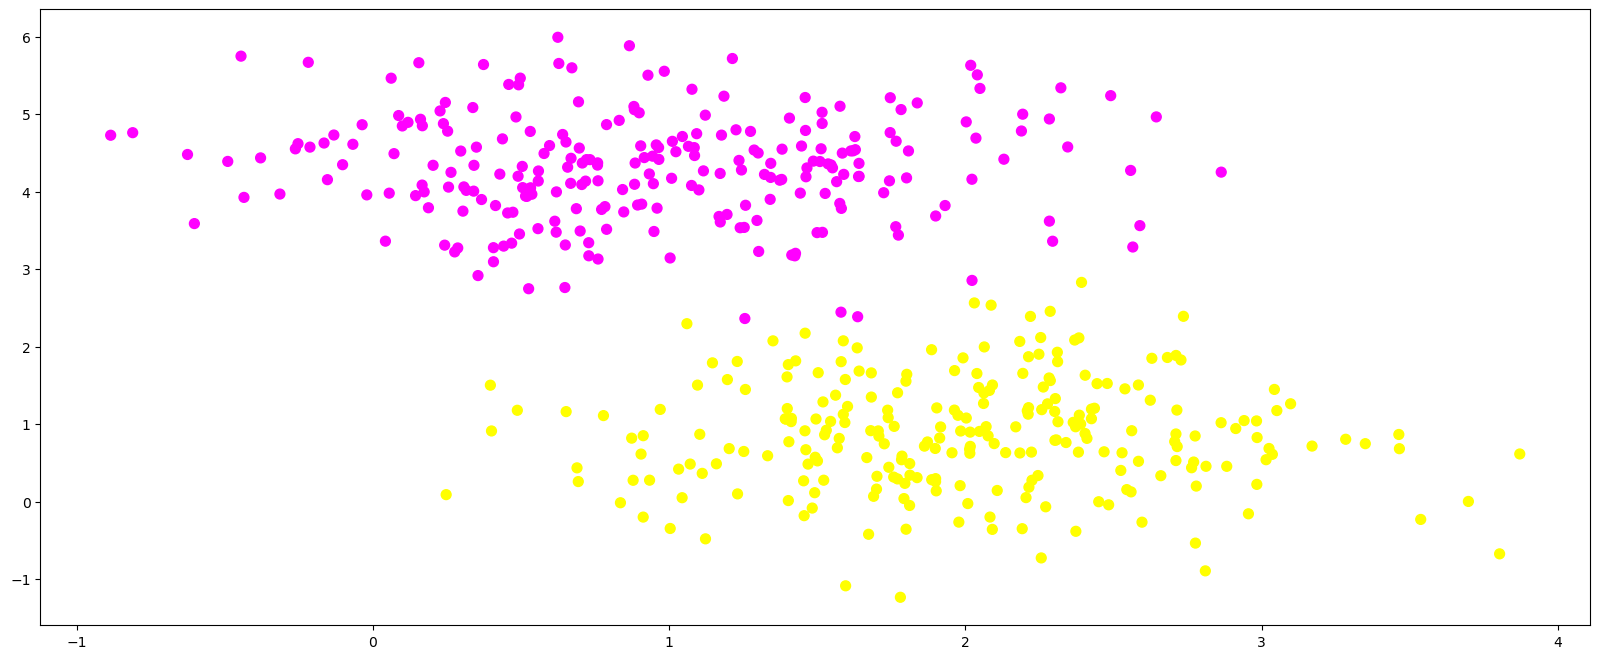

In [4]:
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.70) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show()  

In [5]:
def visualize_linear_svc(svc):
    """
    Plots Support Vector Classifier data and hyperline
    """
    fig, ax = plt.subplots()
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    Z = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])

    Z = Z.reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
    ax.plot(xx,yy)

    ax.axis([x_min, x_max,y_min, y_max])
    plt.show()

Будуємо класифікатор з прямою лінією розподілу.

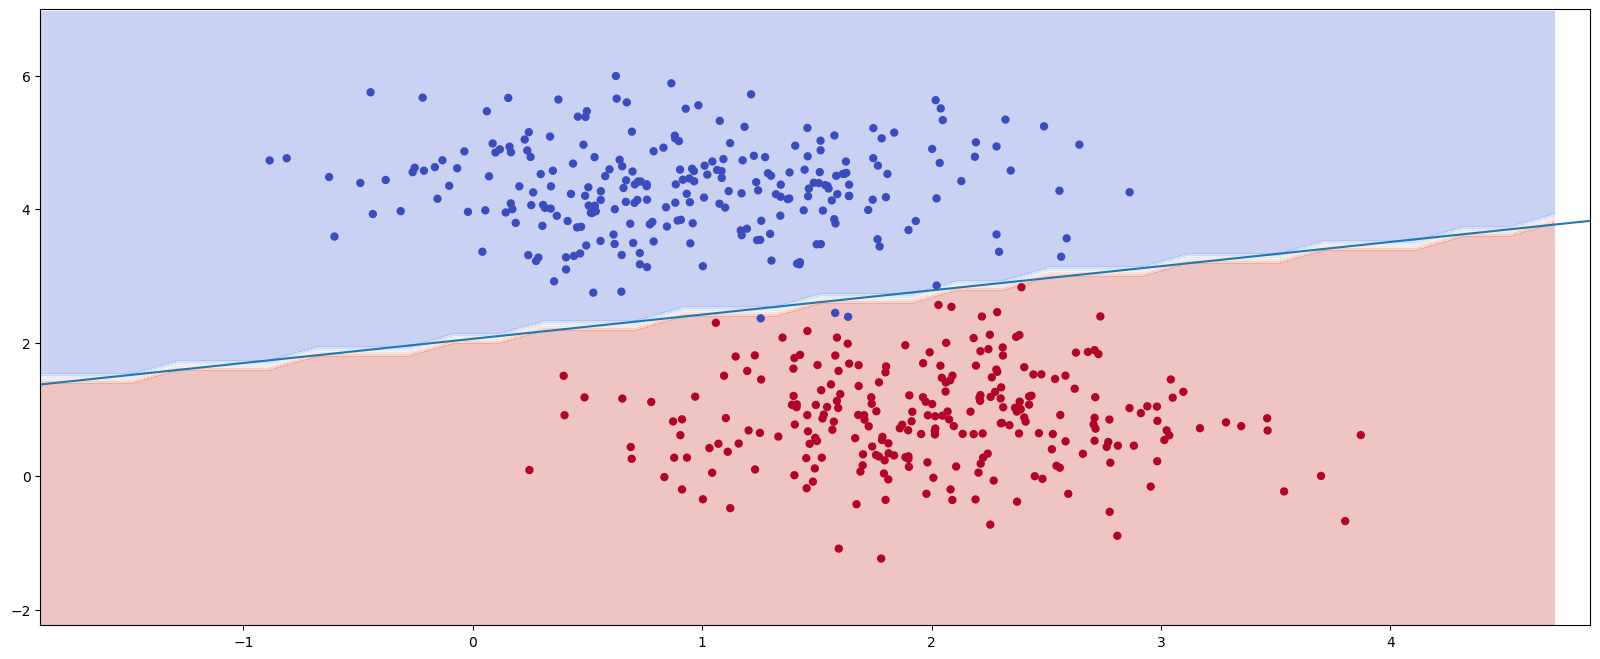

array([[ 5.58850252e-01,  4.26699022e+00],
       [ 2.18401537e+00,  6.27820828e-01],
       [ 6.96655758e-01,  4.56282645e+00],
       [ 2.18917491e+00,  4.78293810e+00],
       [ 2.72775290e+00,  1.82800765e+00],
       [ 1.30046131e+00,  4.49915436e+00],
       [ 1.87492012e-01,  3.79231290e+00],
       [ 6.51752896e-01,  4.64082436e+00],
       [ 2.62949278e+00,  1.84962764e+00],
       [ 2.86362692e+00,  4.25204006e+00],
       [ 2.52300089e-01,  4.78090349e+00],
       [ 4.13883314e-01,  3.82110248e+00],
       [-2.52853330e-01,  4.61944145e+00],
       [ 3.53702124e+00, -2.29951222e-01],
       [ 1.00331146e+00,  3.14408676e+00],
       [ 1.88585364e+00,  1.96044648e+00],
       [ 9.65292600e-01,  4.41643705e+00],
       [ 9.12571210e-01,  8.50669752e-01],
       [ 2.07001094e+00,  9.67281780e-01],
       [ 1.09294153e+00,  4.74830933e+00],
       [ 7.32731574e-01,  4.41323161e+00],
       [ 1.58786862e+00,  2.07500888e+00],
       [ 2.40435071e+00,  1.63124417e+00],
       [ 5.

In [19]:
clf = SVC(kernel='linear') 
clf.fit(X, Y)
visualize_linear_svc(clf)
X

## SVM в задачах класифікації

Для задачі класифікації ми використаємо датасет, що містить ряд характеристик вебсайтів та на основі них встановлює чи сайт є фішинговим чи ні.

In [9]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('data/phishing/dataset.arff')
phishingDf = pd.DataFrame(data[0])
phishingDf = phishingDf.apply(pd.to_numeric)
phishingDf.head(100)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,1,1,1,-1
96,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,-1,0,-1,1,-1,1,-1
97,1,1,1,1,1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,-1,1,-1
98,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,0,-1,1,0,-1,-1


### Завдання 2

Чи збалансований датасет?
Так

Розіб'ємо датасет на два: навчальний та тестовий

In [10]:
target = 'Result'
msk = np.random.rand(len(phishingDf)) < 0.8
train = phishingDf[msk]
train_x = train.drop(target, axis=1)
train_y = train[target]
test = phishingDf[~msk]
test_x = test.drop(target, axis=1)
test_y = test[target]

### Завдання 3

a) Побудуйте модель класифікації вебсайтів на основі `SVC` з ядром `linear`.

In [39]:
clf = SVC(kernel='linear', C=1)
clf.fit(train_x, train_y)

svc_predict = clf.predict(test_x)

b) Здійсніть оцінку моделі на основі метрик `accuracy`, `precision`, `recall` та `f1_score`.

In [40]:
accuracy_score(test_y, svc_predict), precision_score(test_y, svc_predict), recall_score(test_y, svc_predict), f1_score(test_y, svc_predict)

(0.9263494967978042, 0.9263410728582866, 0.9437194127243067, 0.934949494949495)

### Завдання 4

a) Побудуйте модель класифікації вебсайтів на основі `LinearSVC`.

In [43]:
clf = LinearSVC(dual="auto")
clf.fit(train_x, train_y)

linearsvc_predict = clf.predict(test_x)

b) Здійсніть оцінку моделі на основі метрик `accuracy`, `precision`, `recall` та `f1_score`.

In [44]:
accuracy_score(test_y, linearsvc_predict), precision_score(test_y, linearsvc_predict), recall_score(test_y, linearsvc_predict), f1_score(test_y, linearsvc_predict)

(0.9254345837145471,
 0.9228321400159109,
 0.9461663947797716,
 0.9343536045106725)

c) Чи однакові результати ви отримали у порівнянні з моделлю `SVC`? Якщо ні, то чому?

**Підказка**. Ознайомтесь з методами One-vs-One та One-vs-All. https://www.youtube.com/watch?v=_s3z8dQX3pM

**Відповідь**: Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions

## SVM в задачах регресійного аналізу

Регресійний аналіз передбачає, що замість встановлення приналежності об'єкту до певного класу, ми здійснюємо оцінку певної величини (наприклад, ми хочемо оцінити вартість житла замість його цінової категорії).

Для задачі регресійного аналізу використаємо датасет з цінами на житло. Датасет містить такі колонки:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's dollars

Колонка MEDV є цільовою.

In [46]:
housingDf = pd.read_csv("data/housing/housing.data.tsv",header=None,sep='\t')
housingDf.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B" ,"LSTAT","MEDV"]
housingDf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Завдання 5

a) Чи є в датасеті пропущені дані? Якщо так, то приберіть записи з пропусками.

In [49]:
housingDf.dropna(inplace=True)

b) Побудуйте точкові графіки (scatter) залежності цільового значення (MEDV) від B, CHAS, CRIM, INDUS, RAD? Як ви вважаєте, чи присутні в цьому випадку викиди?

C:\Users\Admin\AppData\Local\Temp\ipykernel_13896\9801963.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(housingDf[feature], housingDf['MEDV'], s=50, cmap='spring');


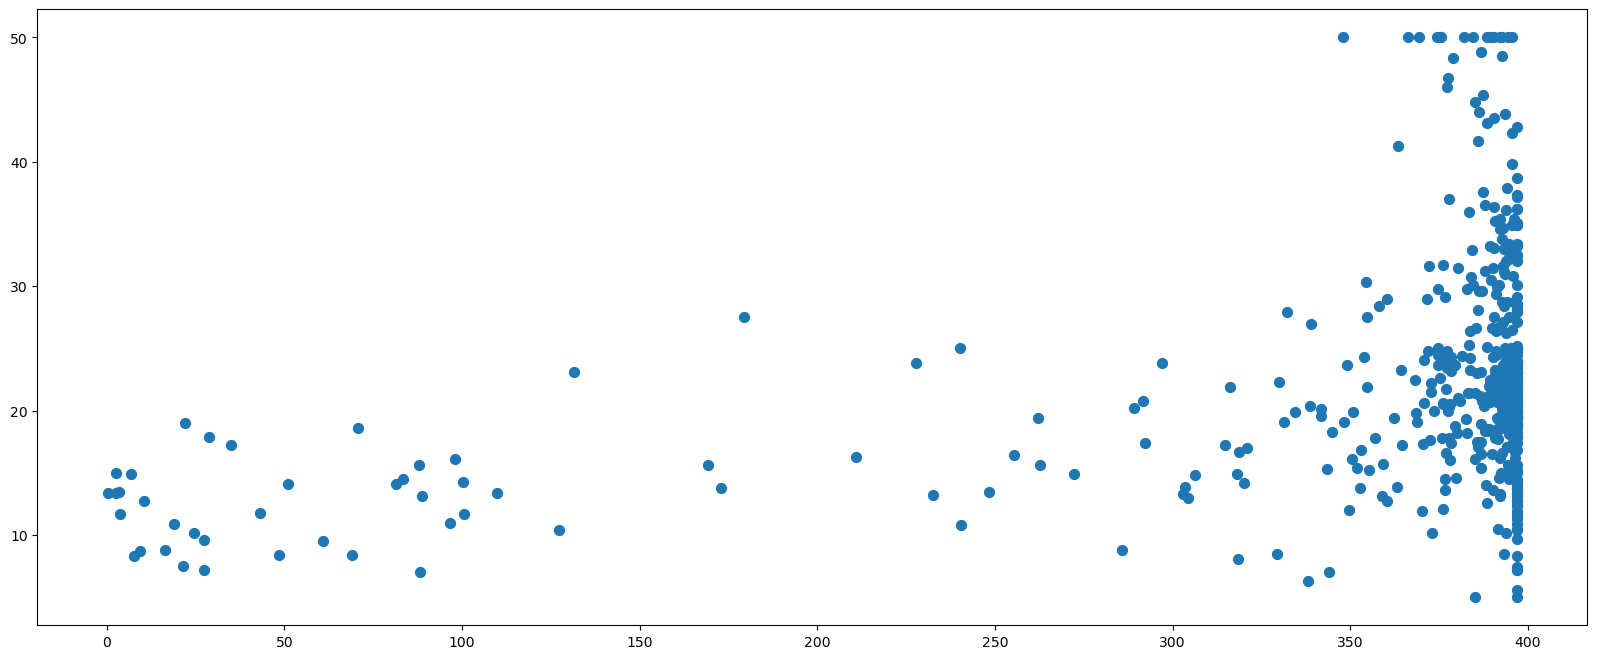

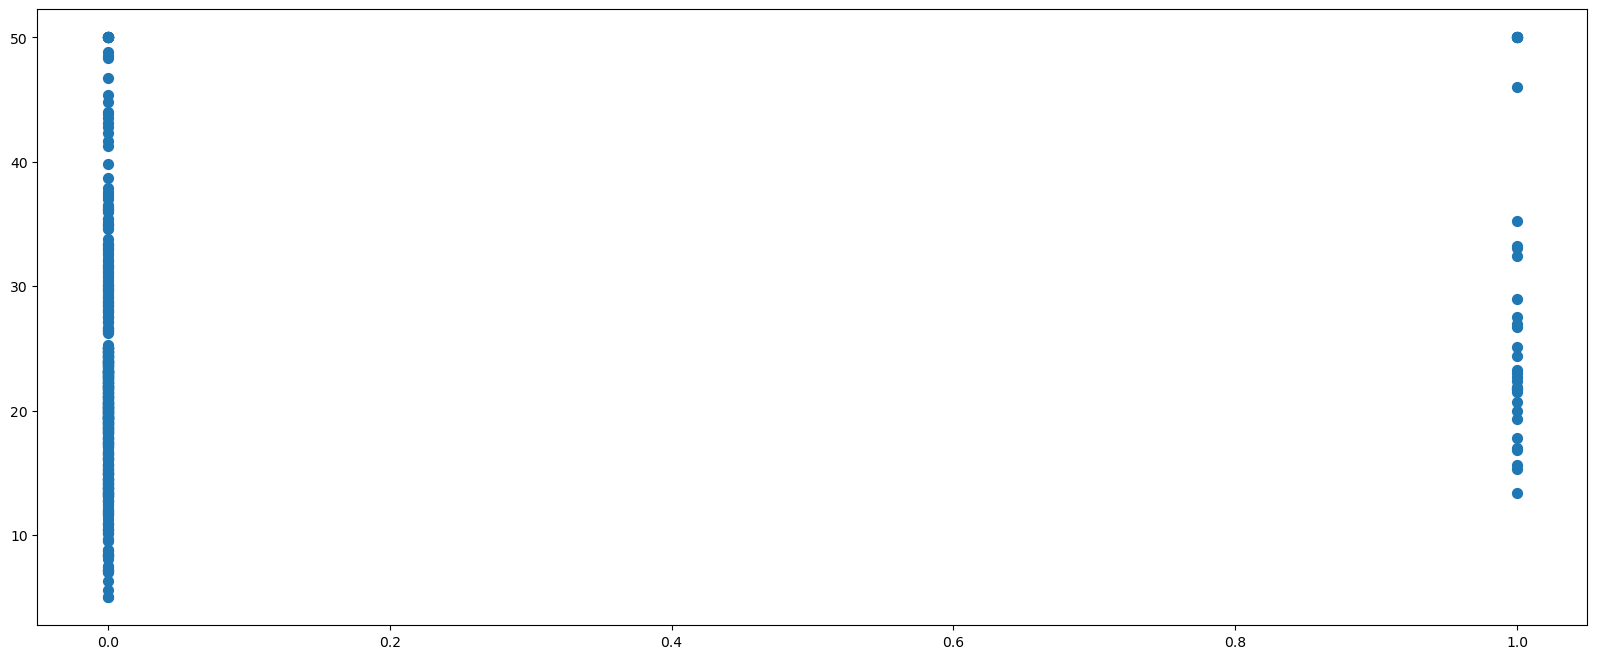

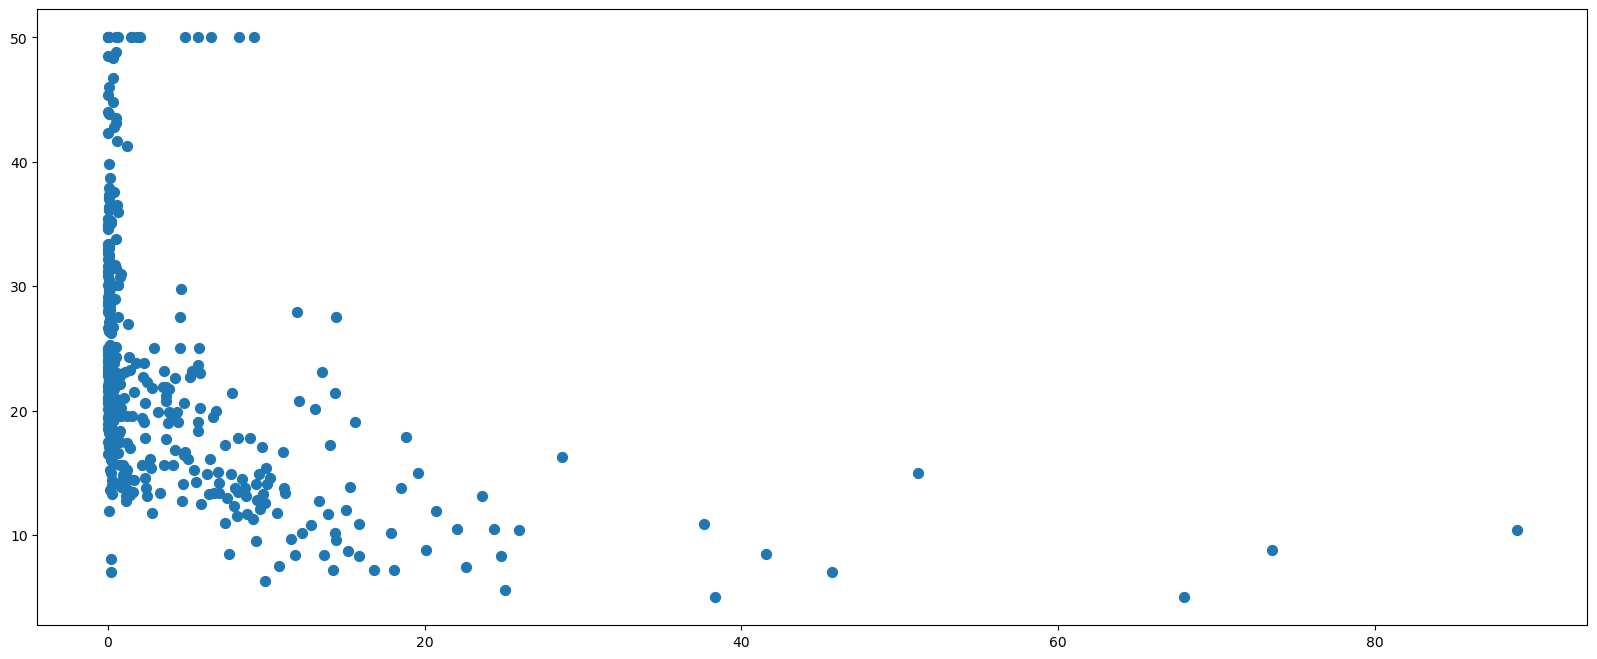

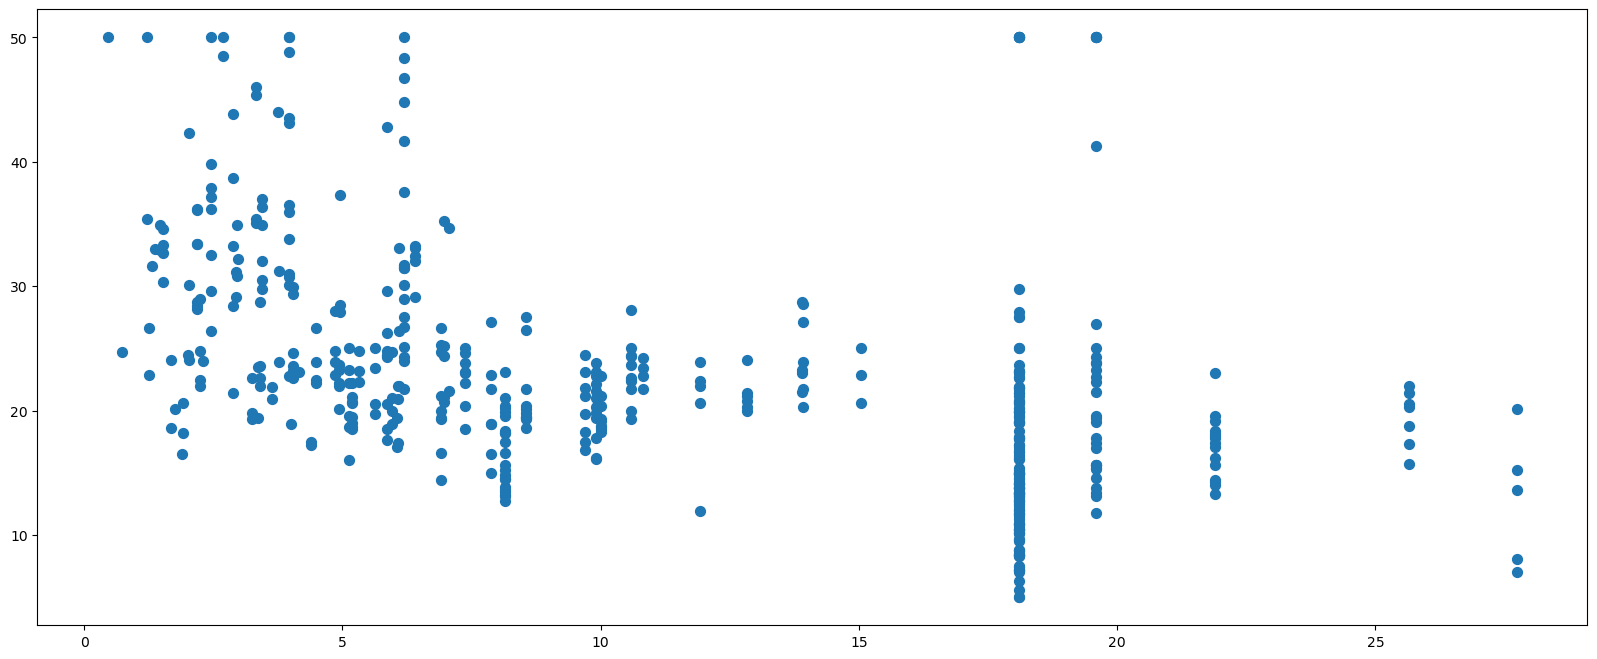

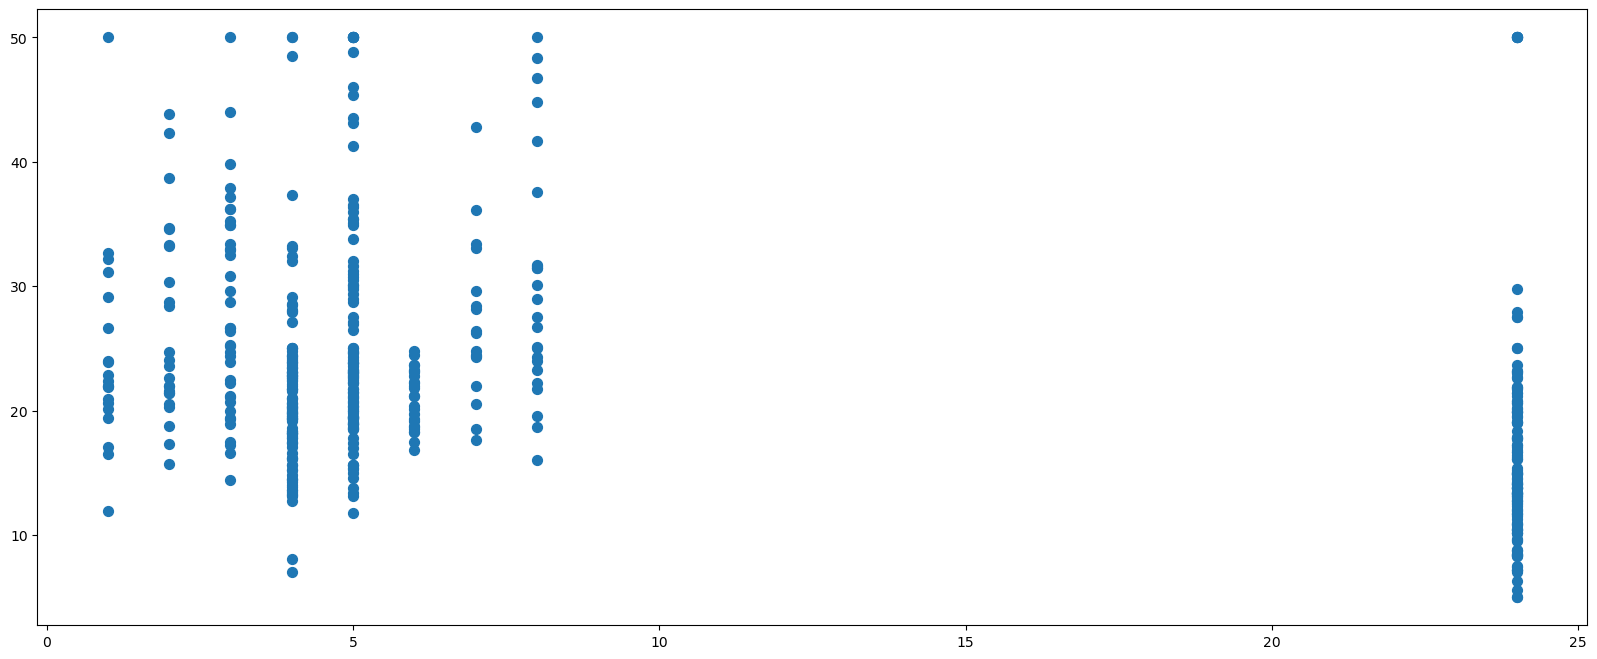

In [57]:
# plotting scatters  

for feature in ['B', 'CHAS', 'CRIM', 'INDUS', 'RAD']:
    plt.scatter(housingDf[feature], housingDf['MEDV'], s=50, cmap='spring');
    plt.show()

Розіб'ємо датасет на два: навчальний та тестовий

In [58]:
target = 'MEDV'
msk = np.random.rand(len(housingDf)) < 0.8
train = housingDf[msk]
train_x = train.drop(target, axis=1)
train_y = train[target]
test = housingDf[~msk]
test_x = test.drop(target, axis=1)
test_y = test[target]

### Завдання 6

Використовуючи `Support Vector Regression` (клас [`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)) побудуйте модель аналізу ціни житла. Використовуйте стандартні параметри.

In [70]:
rbf_svr = SVR()
clf = rbf_svr.fit(train_x, train_y) # Create and train your SVR model

In [71]:
test_predicted = rbf_svr.predict(test_x) # Predict values for 'test_x'

### Завдання 7

Оцініть якість моделі.

**Зауваження**. Для задач регресії використовуються інші методи оцінки моделей. Ви можете прочитати про них [тут](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). В даному випадку використайте `mean_squared_error`. В цьому випадку чим менше значення, тим краще працює модель.

In [72]:
rbf_mse = mean_squared_error(test_predicted, test_y)

rbf_mse

70.61543571732689

### Завдання 8

Змініть ядро моделі `SVR` на `linear` та здійсніть навчання та оцінку моделі. Яка з моделей є кращою?

In [75]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(train_x, train_y)
test_predicted_linear = linear_svr.predict(test_x)

linear_mse = mean_squared_error(test_predicted_linear, test_y)

rbf_mse, linear_mse, "linear is better" if linear_mse > rbf_mse else "rbf best"

(70.61543571732689, 38.16517526828109, 'rbf best')